# Predikcia ochorenie stitnej zlazy

-----

## Analyza dat

#### Nacitanie potrebnych kniznic

In [90]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

#### Nastavenie zobrazovania tabuliek

In [2]:
pd.options.display.width = None
pd.options.display.max_columns = None

#### Nacitanie dat

In [3]:
data_personal = pd.read_csv("data/personal_train.csv")
data_other = pd.read_csv("data/other_train.csv")

#### Samotna analyza

In [4]:
data_personal.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,94-05-02
1,1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29 00 00 00
2,2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09
3,3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16 00 00 00
4,4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15


In [5]:
data_other.head()

,Unnamed: 0,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,thyroid surgery,workclass,I131 treatment,class,marital-status,goitre,native-country,hypopituitary,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
0,0,Latonya Wilhelm,"397 Joshua Forge Suite 012\nEast Ericburgh, WV...",f,11th,f,NaN,NaN,0.0,0.0,f,f,NaN,NaN,28729.0,40.0,Not-in-family,f,Private,f,negative.|1821,Separated,f,United-States,f,F,"{'TSH measured':'f','query hyperthyroid':'f','...",f,other,7.0,Machine-op-inspct,f,?,White,f
1,1,Stacy Martinson,"59472 Brian Views Apt. 885\nKeithhaven, KS 03608",t,11th,f,124.0,1.04,0.0,0.0,t,f,0.035,NaN,250121.0,40.0,Wife,f,Private,f,negative.|3498,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",f,other,7.0,Other-service,f,?,White,f
2,2,Linda Derby,Unit 5333 Box 7103\nDPO AA 03763,t,HS-grad,f,60.0,1.04,0.0,0.0,f,f,11.000,0.8,296125.0,30.0,Unmarried,f,Private,f,negative.|3768,Separated,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,9.0,Priv-house-serv,f,?,Black,f
3,3,Albert Cipriano,"38302 Bradshaw Rue\nNorth Hannahshire, NC 34515",t,Bachelors,f,101.0,0.81,0.0,0.0,f,f,0.250,2.0,187830.0,50.0,Not-in-family,f,Private,f,negative.|2403,Never-married,f,United-States,f,FALSE,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,13.0,Exec-managerial,f,?,White,f
4,4,David Cook,"7984 Jason Motorway Suite 440\nNelsonville, OK...",t,Some-college,f,89.0,0.83,0.0,0.0,f,f,1.800,2.3,312017.0,40.0,Not-in-family,f,Private,f,negative.|1588,Never-married,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,other,10.0,Exec-managerial,f,?,White,f


In [6]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 6 columns):
Unnamed: 0       2237 non-null int64
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 104.9+ KB


In [7]:
data_personal.describe(include='all')

,Unnamed: 0,name,address,age,sex,date_of_birth
count,2237.000000,2237,2237,2236.000000,2237,2236
unique,NaN,2236,2237,NaN,3,2196
top,NaN,Terry Murphy,"7730 Abbott Place Apt. 830\nSouth Emilytown, C...",NaN,F,1973-07-29
freq,NaN,2,1,NaN,1448,2
mean,1118.000000,NaN,NaN,51.822004,NaN,NaN
std,645.910598,NaN,NaN,20.884439,NaN,NaN
min,0.000000,NaN,NaN,1.000000,NaN,NaN
25%,559.000000,NaN,NaN,36.000000,NaN,NaN
50%,1118.000000,NaN,NaN,54.000000,NaN,NaN
75%,1677.000000,NaN,NaN,67.000000,NaN,NaN


Vidime ze mame tam column Unnamed 0, ktory je vlastne index poradia daneho pozorovania, ktore nam poksytuje defaulte dataframe z pandas, cize mozme tento stlpec zotriet

In [8]:
data_personal = data_personal.drop(['Unnamed: 0'], axis=1)

In [9]:
data_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 35 columns):
Unnamed: 0            2287 non-null int64
name                  2287 non-null object
address               2287 non-null object
FTI measured          2280 non-null object
education             2279 non-null object
lithium               2278 non-null object
TT4                   2126 non-null float64
T4U                   2039 non-null float64
capital-loss          2281 non-null float64
capital-gain          2279 non-null float64
on thyroxine          2272 non-null object
tumor                 2276 non-null object
TSH                   2038 non-null float64
T3                    1804 non-null float64
fnlwgt                2277 non-null float64
hours-per-week        2276 non-null float64
relationship          2278 non-null object
thyroid surgery       2283 non-null object
workclass             2109 non-null object
I131 treatment        2278 non-null object
class                 2280

# Uzitocne informacie o jednotlivych atributoch
- I131 treatment: radioaktivna terapia pre overactive stitnu zlazu
- goitre: swelling in the neck (napuchnutie stitnej zlaze)
- TSH/T3/T4U: hormony produkujuce stitnou zlazou
- capital-loss/gain: prijem z investicnych zdrojov
- fnlwgt: sampling weight nad hore vysssich atributov
- class: nejake divne hodnoty nasledujuce odelene | a nasledovane hodnotami (negative, positive)
- on thyroxine: ci prijma hormon T4U
- TGB: plazma protein ktory viaze thyroxin v krvi

## Poznamka
- Prilis vela T4 thyroxine, sposobuje goitre
- Vacsina atributov obsahujuce T/F hodnoty, maju aj jednu hodnotu s cislom, ktoru bude treba spracovat
- Atribut 'hypopituitary' obsahuje vsetky hodnoty FALSE (mozne ho vyhodit?)
- Date-of-birth je nekonzistentny
- Medical-info JSON stlpec (mozno rozdelit do dalsich stlpcov)

In [10]:
data_other.describe(include='all')

,Unnamed: 0,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,thyroid surgery,workclass,I131 treatment,class,marital-status,goitre,native-country,hypopituitary,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
count,2287.000000,2287,2287,2280,2279,2278,2126.000000,2039.000000,2281.000000,2279.000000,2272,2276,2038.000000,1804.000000,2277.000000,2276.000000,2278,2283,2109,2278,2280,2281,2282,2282,2276,2279,2280,2274,2278,2056.000000,2279,2276,2280,2280,2276
unique,NaN,2236,2237,3,24,3,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,6,3,9,3,2237,6,3,36,2,6,539,3,10,NaN,14,2,1,5,3
top,NaN,Christian Ortega,"1058 Matthew Forges\nChristopherland, KS 28828",t,HS-grad,f,NaN,NaN,NaN,NaN,f,f,NaN,NaN,NaN,NaN,Not-in-family,f,Private,f,negative.|1571,Never-married,f,United-States,f,f,"{'TSH measured':'f','query hyperthyroid':'f','...",t,other,NaN,Adm-clerical,f,?,White,f
freq,NaN,3,3,2043,634,2266,NaN,NaN,NaN,NaN,2005,2221,NaN,NaN,NaN,NaN,734,2250,1465,2239,3,889,2259,2053,2275,2023,109,1797,1177,NaN,390,2275,2280,1891,2241
mean,1143.000000,NaN,NaN,NaN,NaN,NaN,109.462088,0.996436,194.064007,817.727512,NaN,NaN,4.691447,2.020926,187889.619675,38.293058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.050584,NaN,NaN,NaN,NaN,NaN
std,660.344355,NaN,NaN,NaN,NaN,NaN,35.879295,0.191213,9116.985776,5971.192914,NaN,NaN,22.630656,0.814135,103904.464111,12.341755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.494250,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000,0.310000,-200100.000000,0.000000,NaN,NaN,0.005000,0.050000,19395.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,571.500000,NaN,NaN,NaN,NaN,NaN,88.000000,0.880000,0.000000,0.000000,NaN,NaN,0.440000,1.600000,115631.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN
50%,1143.000000,NaN,NaN,NaN,NaN,NaN,104.000000,0.980000,0.000000,0.000000,NaN,NaN,1.400000,2.000000,176262.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN
75%,1714.500000,NaN,NaN,NaN,NaN,NaN,126.000000,1.080000,0.000000,0.000000,NaN,NaN,2.600000,2.400000,237141.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN


Podobne aj pri tomto datasete

In [11]:
data_other = data_other.drop(['Unnamed: 0'], axis=1)

## Atributy datasetu personal

### Ideme preskumat atribut 'age'

/Users/edvin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


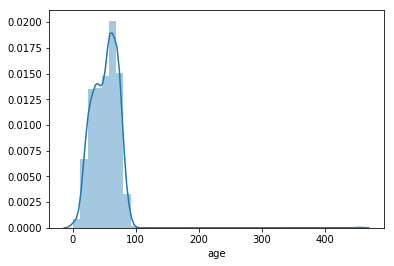

In [12]:
sns.distplot(data_personal['age'].dropna(), bins=40)

Z tohto plotu nam vyplyva ze pacienti su vo veku okolo 50 rokov (vacsina za 50 rokov).

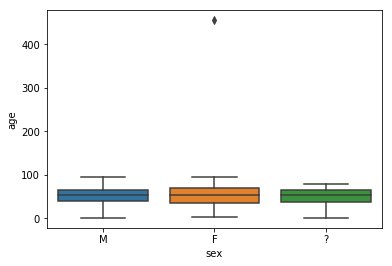

In [13]:
sns.boxplot(y="age", x="sex", data=data_personal)

- Z tohto boxplotu vidime ze mame outliner, ktory bude treba nahradit

### Preskumame atribut 'sex'

In [14]:
data_personal['sex'].value_counts()

F    1448
M     701
?      88
Name: sex, dtype: int64

In [15]:
data_personal[data_personal['sex'] == '?'].head()

,name,address,age,sex,date_of_birth
7,Roy Wilson,"49824 Kim View\nWest Ericborough, VT 42457",54.0,?,1964-06-07
15,Ronald Speigel,"509 Antonio Haven Suite 117\nWest Ricky, OK 35203",72.0,?,1946-10-06
44,John Short,"4081 Montoya Points\nDavidside, WA 68358",31.0,?,1986-10-29
95,Carl Dellosso,"794 Ho Island\nEast Anitamouth, ME 91583",38.0,?,1980-05-20
99,Dennis Neese,"6051 Jennings Mount\nSandraland, WI 13559",30.0,?,1988-08-06


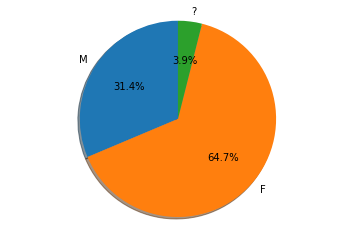

In [16]:
labels = 'M', 'F', '?'
sizes = [len(data_personal[data_personal['sex']=='M'].dropna()), len(data_personal[data_personal['sex']=='F'].dropna()), len(data_personal[data_personal['sex']=='?'].dropna())]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Z piechartu nam je jasne ze v datasete 'data_personal' sa nachadzaju viac zien ako muzov a par ludi nemaju pohlavie vyplnene, co asi bude treba doplnit v predspracovani nasledovne:

- Bud pouzijuc najcastejsiu hodnotu, cize F
- Alebo natrenovat nejaku linearnu regresiu, alebo kNN aby nam dala chybajuce hodnoty a hodnoty namiesto '?'

### Atribut 'date_of_birth'

In [17]:
data_personal['date_of_birth'].unique()

array(['94-05-02', '1974-04-29 00 00 00', '1962-06-09', ..., '1983-08-14',
       '1932-06-13', '1937/03/19'], dtype=object)

- Nekonzistetne hodnoty v zapisu datumu narodenia, bude ich treba upravit na jeden format.

## Atributy datasetu other

### Atribut 'class'

In [18]:
data_other['class'].head()

0    negative.|1821
1    negative.|3498
2    negative.|3768
3    negative.|2403
4    negative.|1588
Name: class, dtype: object

Potrebujeme rozdelit dany popis (negative) a cislo zanim.

In [19]:
data_other['correct_class'] = data_other['class'].map(lambda x: str(x).split('.')[0])

In [20]:
def split_class_number(x):
    x = str(x).split('.')
    return x[len(x) - 1]

data_other['class_number'] = data_other['class'].map(lambda x: split_class_number(x))

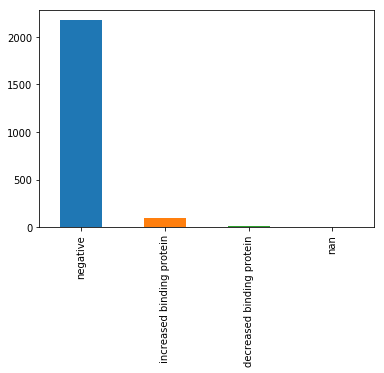

In [21]:
data_other['correct_class'].value_counts().plot(kind='bar')

-------

### Ideme si zobrazit vsetky stlpce s boolovskymi hodnotami

In [22]:
def print_bool_attribute(column_name):
    print("****")
    print(column_name)
    print(data_other[column_name].value_counts())
    print("****")
    print(" ")

In [23]:
print_bool_attribute('FTI measured')
print_bool_attribute('lithium')
print_bool_attribute('on thyroxine')
print_bool_attribute('tumor')
print_bool_attribute('thyroid surgery')
print_bool_attribute('I131 treatment')
print_bool_attribute('goitre')
print_bool_attribute('hypopituitary')
print_bool_attribute('query on thyroxine')
print_bool_attribute('T3 measured')
print_bool_attribute('TBG measured')
print_bool_attribute('TBG')
print_bool_attribute('pregnant')

****
FTI measured
t      2043
f       236
t.4       1
Name: FTI measured, dtype: int64
****
 
****
lithium
f      2266
t        11
f.9       1
Name: lithium, dtype: int64
****
 
****
on thyroxine
f    2005
t     267
Name: on thyroxine, dtype: int64
****
 
****
tumor
f       2221
t         54
f.11       1
Name: tumor, dtype: int64
****
 
****
thyroid surgery
f      2250
t        32
f.5       1
Name: thyroid surgery, dtype: int64
****
 
****
I131 treatment
f      2239
t        38
f.6       1
Name: I131 treatment, dtype: int64
****
 
****
goitre
f       2259
t         22
f.10       1
Name: goitre, dtype: int64
****
 
****
hypopituitary
f       2275
f.12       1
Name: hypopituitary, dtype: int64
****
 
****
query on thyroxine
f        2023
F         112
FALSE     110
t          29
T           4
f.1         1
Name: query on thyroxine, dtype: int64
****
 
****
T3 measured
t      1797
f       476
t.1       1
Name: T3 measured, dtype: int64
****
 
****
TBG measured
f       2275
f.14       1
Na

- Premapovat hodnoty na binarne hodnoty (0/1)
    - Odstranit nekonzistenciu v pripade inych hodnot ako t/f podla toho ze aka hodnota sa nachadza pred botkou a cislom
    - V pripade atributu 'query on thyroxine' sa vyskytuju aj ine hodnoty ako TRUE,FALSE,T,F ktore taktiez treba premapovat na t/f.
    - Atribut 'TBG' by sme mohli odstranit kedze neobsahuje ziadne zmysluplne informacie (same otazniky)
    - Atribut 'TBG measured' ma tiez iba f hodnoty.

In [24]:
data_other[data_other['FTI measured'] == 't.4']

,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,thyroid surgery,workclass,I131 treatment,class,marital-status,goitre,native-country,hypopituitary,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant,correct_class,class_number
543,Norma Dimarco,"655 Hood Hollow\nRobertport, NM 56008",t.4,Some_college,f.9,125.0,1.14,0.0,0.0,f,f.11,1.3,2.5,143554.0,38.0,Not-in-family,f.5,Private,f.6,negative.|3733,Separated,f.10,United-States,f.12,f.1,"{'TSH measured':'t','query hyperthyroid':'f.8'...",t.1,SVHC,10.0,Adm-clerical,f.14,?,White,f.4,negative,|3733


- Zistili sme ze vsetky ine hodnoty t/f boli sposobene jednym riadkom.

#### Preskumanie stlpcov s hormonami (TT4/T4U/TSH)

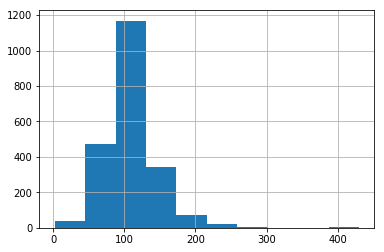

In [25]:
data_other['TT4'].hist()

Z histogramu vidno ze je to normalne rozdelenie, cize mozeme si vyplotovat boxplot

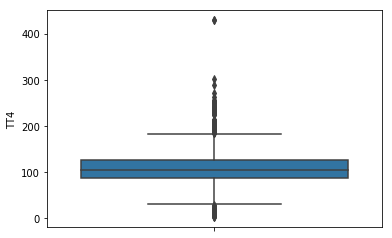

In [26]:
sns.boxplot(y="TT4", data=data_other)

Odstranit outlayeri alebo nahradenit vychylene hodnoty hranicnymi hodnotami.

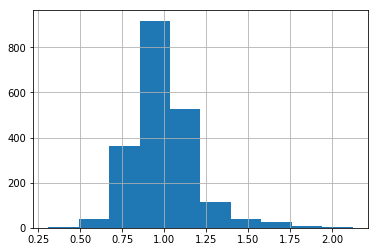

In [27]:
data_other['T4U'].hist()

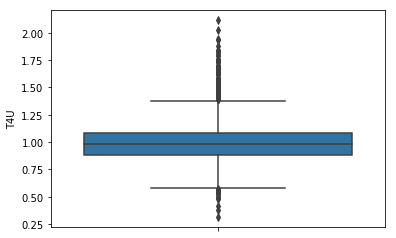

In [28]:
sns.boxplot(y="T4U", data=data_other)

Odstranit outlayeri alebo nahradenit vychylene hodnoty hranicnymi hodnotami.

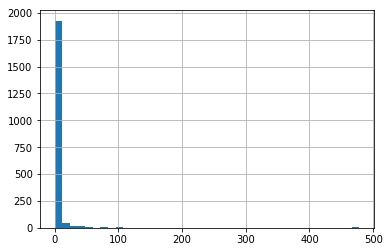

In [29]:
data_other['TSH'].hist(bins=40)

In [30]:
data_other['TSH'].describe()

count    2038.000000
mean        4.691447
std        22.630656
min         0.005000
25%         0.440000
50%         1.400000
75%         2.600000
max       478.000000
Name: TSH, dtype: float64

75% kvartil je v hodnote 2.6, cize vsetky hodnoty su blizke 0. Nejde tu o normalne rozdelenie

### Zobrazenie zavislosti medzi atributmi T4U a T3

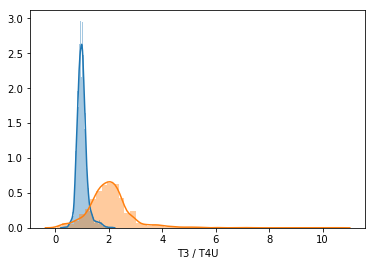

In [31]:
sns.distplot(data_other['T4U'].dropna())
sns.distplot(data_other['T3'].dropna())
plt.xlabel("T3 / T4U")
plt.show()

Vzajomna distribucia T3/T4U vo vzorke

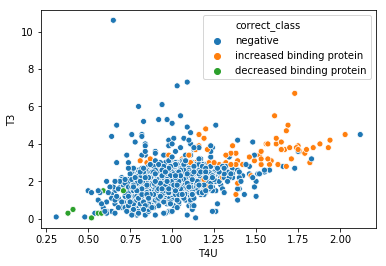

In [32]:
sns.scatterplot(x='T4U', y='T3', hue='correct_class', data=data_other[data_other['correct_class'] != 'nan'])

Z tohto plot pekne vidno zavislost medzi classou a hodnotami hormonou T3 a T4U

-----

/Users/edvin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/edvin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


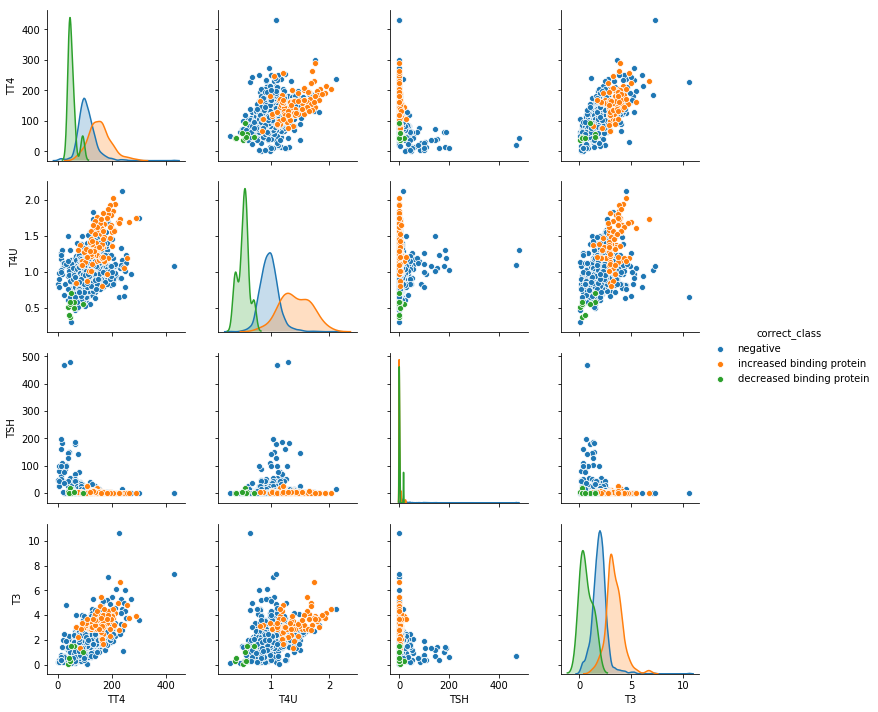

In [33]:
sns.pairplot(data_other[data_other['correct_class'] != 'nan'], hue='correct_class', vars=['TT4', 'T4U', 'TSH', 'T3'])

### Prezrieme si ako silno koreluju atributy medzi sebou

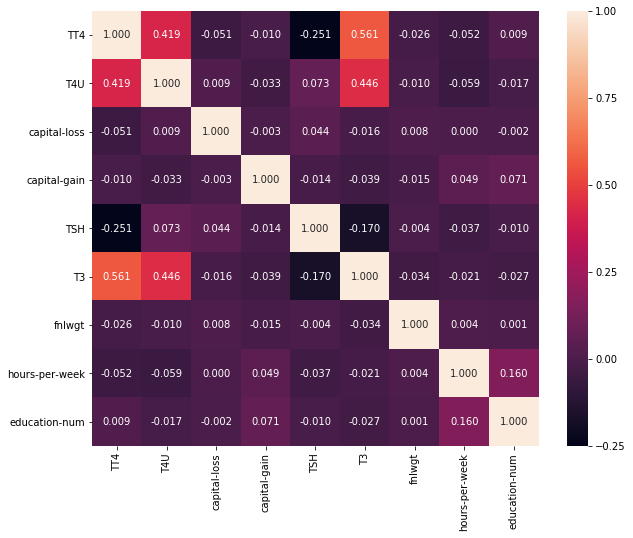

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_other.corr(), ax=ax, annot=True, fmt=".3f")

#### Z nasledovneho grafu jasno vidiet zavislosti medzi atributmy T3, T4U, A TT4

----

### Atribut 'native-country'

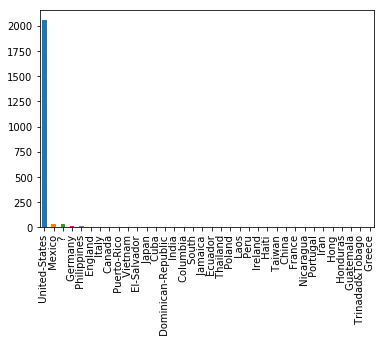

In [35]:
data_other['native-country'].value_counts().plot(kind='bar')

Vidime ze vacsina pacientov je zo spojenych statov

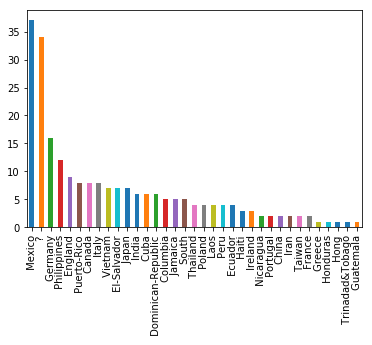

In [36]:
data_other[data_other['native-country'] != ' United-States']['native-country'].value_counts().plot(kind='bar')

- Potrebujeme trimnut vsetky stringy preto lebo sa tam nachadzaju medzeri na zaciatku alebo konci stringov

### Atribut 'referral source'

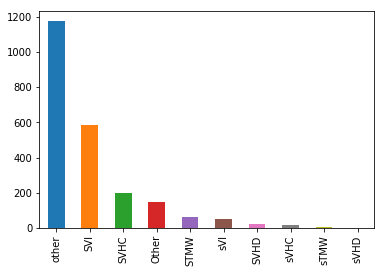

In [37]:
data_other['referral source'].value_counts().plot(kind='bar')

### Atribut 'education-num'

In [38]:
data_other['education-num'].unique()

array([ 7.,  9., 13., 10., 14., nan, 12.,  6., 11., 15.,  4.,  8.,  3.,
        5., 16.,  2.,  1.])

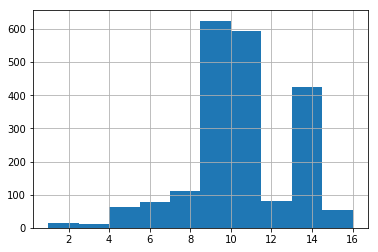

In [39]:
data_other['education-num'].hist()

Rozdelenie nie je uplne rovnomerne.

### Atribut 'education'

In [40]:
data_other['education'].value_counts()

 HS-grad         634
 Some-college    482
 Bachelors       362
 Masters         114
 Assoc-voc        97
 11th             91
 10th             86
 Assoc-acdm       84
 HS_grad          63
 Some_college     57
 Prof-school      37
 7th-8th          35
 12th             32
 9th              29
 Doctorate        17
 5th-6th          13
 Assoc_voc        10
 1st-4th          10
 Assoc_acdm        8
 7th_8th           6
 5th_6th           4
 Preschool         4
 Prof_school       3
 1st_4th           1
Name: education, dtype: int64

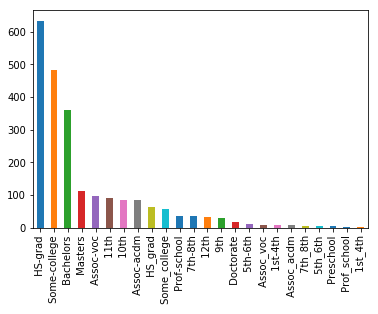

In [41]:
data_other['education'].value_counts().plot(kind="bar")

#### Vzajomne porovnanie 'education-num' a 'education'

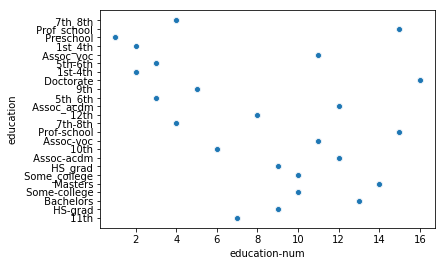

In [42]:
 sns.scatterplot(x="education-num", y="education", data=data_other)

Z daneho grafu vidno, ze jednotlive parametre spolu velmi nesuvisia.

### Atribut 'marital-status'

In [43]:
data_other['marital-status'].value_counts()

 Never-married            889
 Married-civ-spouse       713
 Divorced                 404
 Widowed                  128
 Separated                111
 Married-spouse-absent     36
Name: marital-status, dtype: int64

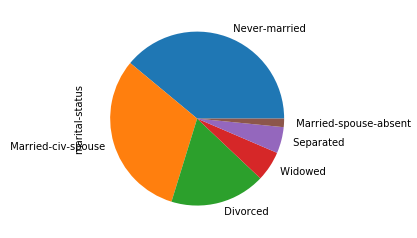

In [44]:
data_other['marital-status'].value_counts().plot(kind="pie")

### Atribut 'workclass'

In [45]:
data_other['workclass'].value_counts()

 Private             1465
 ?                    140
 Self-emp-not-inc     129
 Local-gov            124
 State-gov             83
??                     61
 Federal-gov           59
 Self-emp-inc          46
 Without-pay            2
Name: workclass, dtype: int64

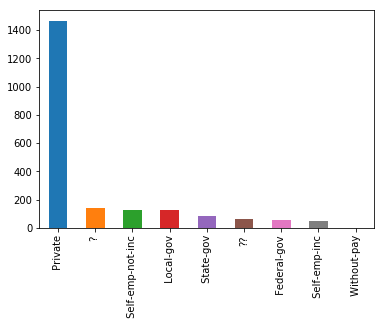

In [46]:
data_other['workclass'].value_counts().plot(kind="bar")

### Vzajomne porovnanie 'workclass' a 'marital_status'

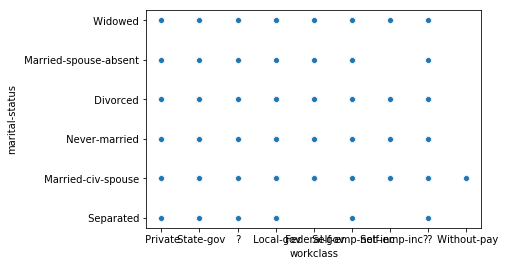

In [47]:
 sns.scatterplot(x="workclass", y="marital-status", data=data_other)

Z grafu vidno, ze rozlozenie do 'workclass' je rovnomerne a nezda sa byt viazane na 'marital-status'

### Atribut 'occupation'

In [48]:
data_other['occupation'].value_counts()

 Adm-clerical         390
 Other-service        378
 Prof-specialty       308
 Exec-managerial      257
 Sales                238
 ?                    161
 Craft-repair         154
 Machine-op-inspct    127
 Handlers-cleaners     60
 Tech-support          54
 Transport-moving      53
 Farming-fishing       44
 Protective-serv       34
 Priv-house-serv       21
Name: occupation, dtype: int64

Doplnit chybajuce hodnoty vymenovanymi metodamy

### Atribut 'race'

In [101]:
data_other['race'].value_counts()

 White                 1891
 Black                  267
 Asian-Pac-Islander      83
 Amer-Indian-Eskimo      22
 Other                   17
Name: race, dtype: int64

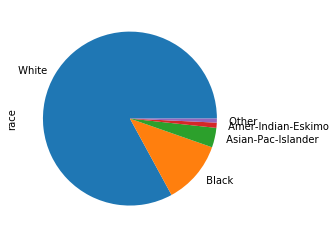

In [49]:
data_other['race'].value_counts().plot(kind='pie')

### Atribut 'pregnant'

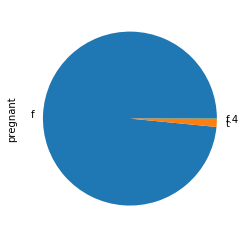

In [50]:
data_other['pregnant'].value_counts().plot(kind='pie')

-----

## Hypoteza 1
Existuje rozdiel v strednych hodnotach T3 pre zdravych a chorych pacientov

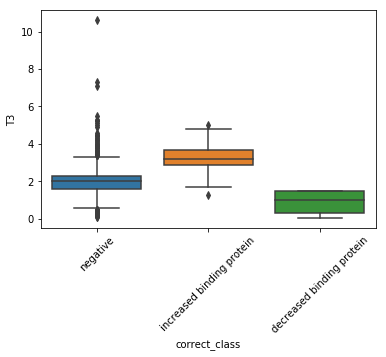

In [56]:
sns.boxplot(y="T3", x="correct_class", data=data_other.dropna())
plt.xticks(rotation=45)
plt.show()

Z boxplotu si mozeme vsimnut ze je tam rozdiel ked porovnavame T3 zdravych a chorych pacientov.

In [68]:
negative = data_other.loc[data_other['correct_class'] == 'negative', 'T3'].dropna()

In [69]:
negative.describe()

count    1707.000000
mean        1.961043
std         0.751620
min         0.050000
25%         1.600000
50%         2.000000
75%         2.300000
max        10.600000
Name: T3, dtype: float64

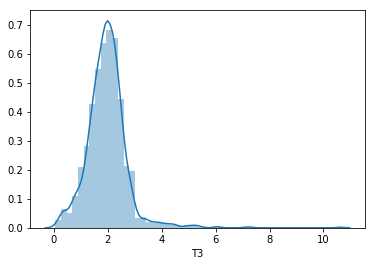

In [70]:
sns.distplot(negative)

Mozeme si vsimnut ze sa nachadzaju vychylene hodnoty ktore potrebujeme nahradit kvartilmy

In [71]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [77]:
negative_out = identify_outliers(negative)
print(len(negative_out))

97


In [78]:
negative = negative.drop(negative_out.index)

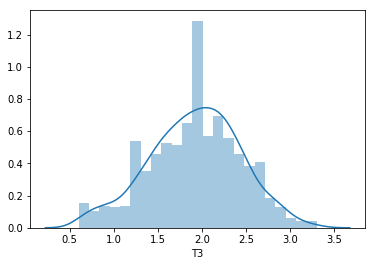

In [79]:
sns.distplot(negative)

Analogicky urobime tie iste kroky pre chorych pacientov

In [80]:
positive = data_other.loc[data_other['correct_class'] != 'negative', 'T3'].dropna()

In [81]:
positive.describe()

count    97.000000
mean      3.074742
std       1.106047
min       0.050000
25%       2.900000
50%       3.100000
75%       3.700000
max       6.700000
Name: T3, dtype: float64

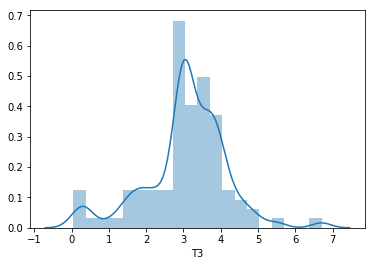

In [83]:
sns.distplot(positive)

In [85]:
positive_out = identify_outliers(positive)
print(len(positive_out))

13


In [86]:
positive = positive.drop(positive_out.index)

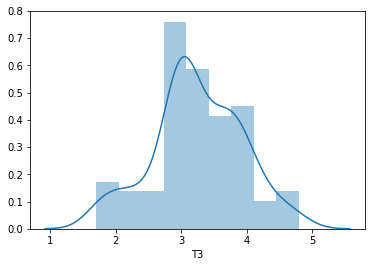

In [87]:
sns.distplot(positive)

Vyplotujeme si QQploty pre obe hodnoty

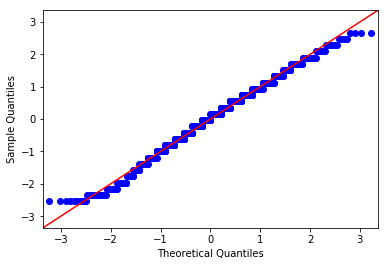

In [92]:
_ = sm.ProbPlot(negative, fit=True).qqplot(line='45')

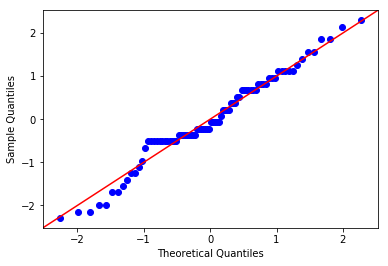

In [93]:
_ = sm.ProbPlot(positive, fit=True).qqplot(line='45')

#### Shapirov-Wilkov test normalnosti

In [94]:
import scipy.stats as stats

In [95]:
stats.shapiro(negative)

(0.9919030070304871, 9.464478267773302e-08)

In [96]:
stats.shapiro(positive)

(0.97516268491745, 0.10379669070243835)

Vidime ze vzorky 'negative' pochadzaju z normalneho rozdelenia, kym vzorky 'positive' pochadzaju z ineho rozdelenia

#### Pouzijeme levenov test na zistenie ci vzorky pochadzaju z rozdeleni s rovnakymi varianciami

In [98]:
stats.levene(positive, negative)

LeveneResult(statistic=10.962288691425087, pvalue=0.0009494165805744989)

Nulovu hypotezu zamietame, preto lebo p < 0.05. Vzorky nepochadzaju z rozdeleni s rovnakymi varianciami

#### Man-Whiteneyho test

In [100]:
stats.mannwhitneyu(positive, negative)

MannwhitneyuResult(statistic=8577.5, pvalue=5.20869347431304e-42)

Z tohto testu nam vypliva ze rozdiel strednych hodnotach pre zdravych a chorych pacientov je signifikantny

## Hypoteza 2
Existuje rozdiel v hodnotach T4U medzi bielymi ludmi v provnani s inimy

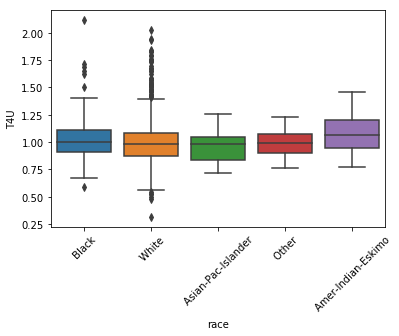

In [109]:
sns.boxplot(y="T4U", x="race", data=data_other.dropna())
plt.xticks(rotation=45)
plt.show()

In [119]:
white = data_other.loc[data_other['race'] == ' White', 'T4U'].dropna()

In [120]:
white.describe()

count    1677.000000
mean        0.992167
std         0.191694
min         0.310000
25%         0.880000
50%         0.980000
75%         1.070000
max         2.030000
Name: T4U, dtype: float64

In [123]:
other = data_other.loc[data_other['race'] != ' White', 'T4U'].dropna()

In [124]:
other.describe()

count    362.000000
mean       1.016215
std        0.187964
min        0.570000
25%        0.900000
50%        1.000000
75%        1.100000
max        2.120000
Name: T4U, dtype: float64

/Users/edvin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


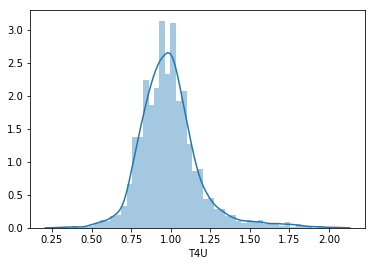

In [125]:
sns.distplot(white)

In [129]:
white_out = identify_outliers(white)
print(len(white_out))

6


In [127]:
white = white.drop(white_out.index)

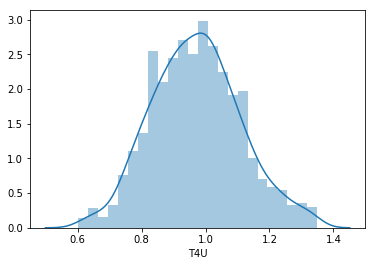

In [128]:
sns.distplot(white)

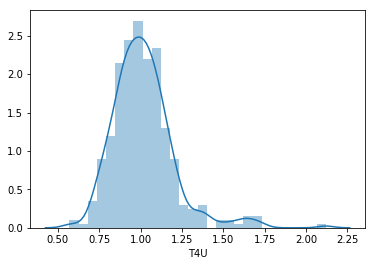

In [130]:
sns.distplot(other)

In [131]:
other_out = identify_outliers(other)
print(len(other_out))

14


In [132]:
other = other.drop(other_out.index)

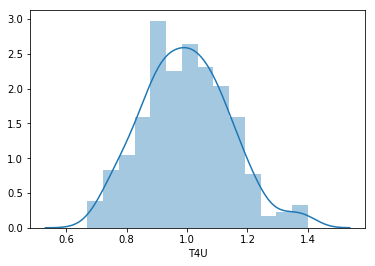

In [133]:
sns.distplot(other)

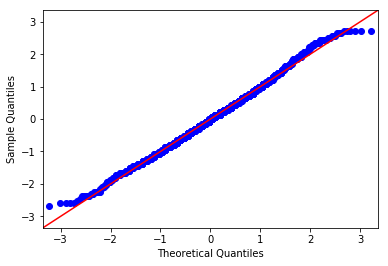

In [134]:
_ = sm.ProbPlot(white, fit=True).qqplot(line='45')

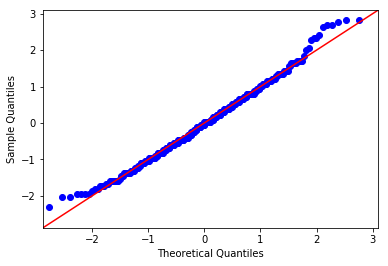

In [135]:
_ = sm.ProbPlot(other, fit=True).qqplot(line='45')

In [136]:
stats.shapiro(white)

(0.9955145120620728, 0.00011475535575300455)

In [137]:
stats.shapiro(other)

(0.9899577498435974, 0.017435478046536446)

In [138]:
stats.levene(white, other)

LeveneResult(statistic=0.35663988030851423, pvalue=0.5504482513267173)

In [139]:
stats.ttest_ind(white, other)

Ttest_indResult(statistic=-3.0631638427442214, pvalue=0.0022203204105504097)

------

## Spojenie datasetov

 - Datasety 'personal' a 'other' maju spolocne 2 stlpce a to 'name' a 'address'. Na zaklade tychto atributov, by sme mohli datasety spojit.
 - Prvky, ktore by sme nevedeli namapovat z jedneho datasetu do druheho by sme vyhodili. 

TODO:
- Overit hypotezi
- Napisat akym sposobom spojit datasety